# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [4]:
conda install python=3.10

Channels:
 - defaults
Platform: osx-64
doneecting package metadata (repodata.json): - 
doneing environment: / 

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Let us start by importing the required libraries

In [6]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [8]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [10]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# Read the data
df = pd.read_csv('foodhub_order.csv')

In [12]:
# View the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [14]:
# The size of the dataset
df.size

17082

In [15]:
# The shape of the dataset
df.shape

(1898, 9)

#### Observations:
- The database has 9 columns and 1898 rows. 
- As 9*1898 = 17082, we can conclude that there is no missing data blocks.
----

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- As stated earlier, we have 9 columns and 1898 rows.
- Out of that 4 are integer, 1 is float and 4 are objects (string or mixed type)
---

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [21]:
# Checking for missing values in the data
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- Confirming that there are no missing values in the data.
---

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [24]:
# Get the summary statistics of the numerical data
print("Min time required for food preparation is: ", df.food_preparation_time.min(), "minutes")
print("Avg time required for food preparation is: ", round(df.food_preparation_time.mean(),2), "minutes")
print("Max time required for food preparation is: ", df.food_preparation_time.max(), "minutes")

Min time required for food preparation is:  20 minutes
Avg time required for food preparation is:  27.37 minutes
Max time required for food preparation is:  35 minutes


#### Observations:
- The minumum, average and maximum time required for food preparation are 20 mins, 27.37 mins and 35 minutes respectives.
- That tell that the averaage time required for food preparation after placing an order is 27.37 minutes.
  
- We further can see if it's certain resturants or cuisines taking more time. Or is it weekend/weekeday food preparation taking more time. I won't be running that part here as it's not required to complete this exercise. But will be definetly interesting to see that result. 
---

### **Question 5:** How many orders are not rated? [1 mark]

In [27]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [28]:
df['rating'].value_counts(normalize=True) * 100

Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: rating, dtype: float64

#### Observations:
- There are total 736 orders which are not rated.
- More tha one-third, i.e. 38.78% orders are not rated.
---

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [33]:
# check unique customer ID
df['customer_id'].nunique()

1200

In [34]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

In [35]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

In [36]:
# Check the unique values
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations: 
- There are total 1200 unique customers
- There are total 178 Resturants
- There are total 14 types of cuisines
- Rating given to the orders are either 3, 4, 5 or not given at all. There are not resturants with 1 and 2 ratings. 
---

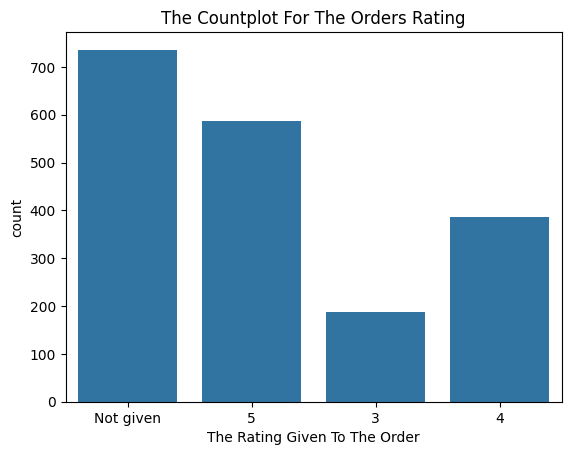

In [38]:
# A countplot for the rating
sns.countplot(data=df,x='rating').set(xlabel='The Rating Given To The Order', title='The Countplot For The Orders Rating')
plt.show()

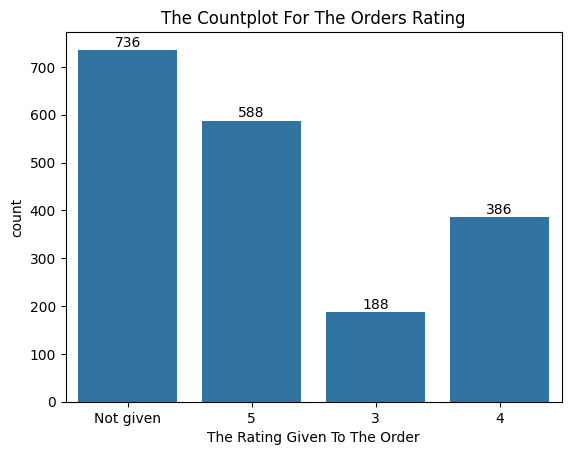

In [39]:
# Alternate way

ax = sns.countplot(data=df, x='rating')
ax.set(xlabel='The Rating Given To The Order', title='The Countplot For The Orders Rating')

# Add count labels on each bar
for bar in ax.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 0.5, str(count), ha='center', va='bottom')

plt.show()

#### Observations: 
- Total 736 orders are not rated. 588, 386 and 188 orders are rated 5, 4 and 3 stars respectively.
---

In [41]:
# # Check the unique values
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

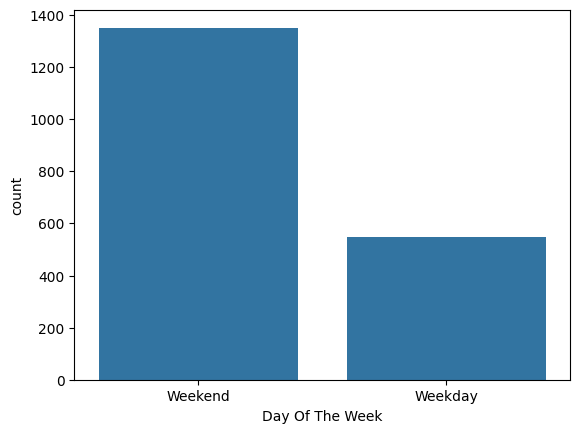

In [42]:
sns.countplot(data=df,x='day_of_the_week').set(xlabel='Day Of The Week')
plt.show()

#### Observations: 
- More orders are placed on weekend than weekdays.
---

[Text(0.5, 0, 'Cuisine Type')]

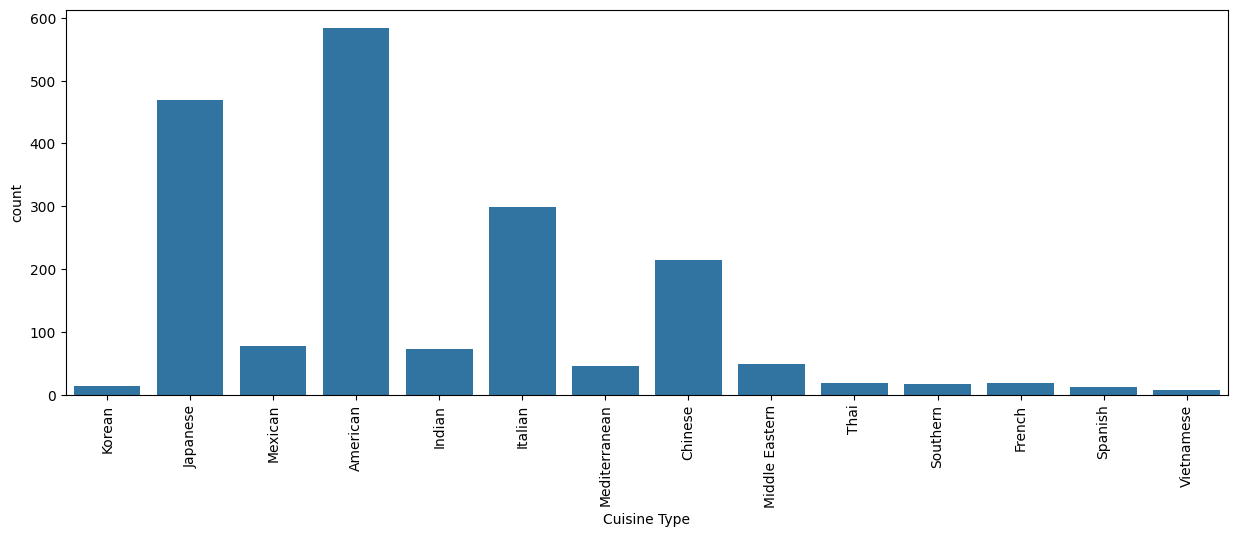

In [44]:
# The countplot for cuisine type.
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
sns.countplot(data = df, x = 'cuisine_type').set(xlabel='Cuisine Type')

#### Observations: 
- American cuisine is the most popular one. Followed by Japanese, Italian and Chinese respectively. 
---

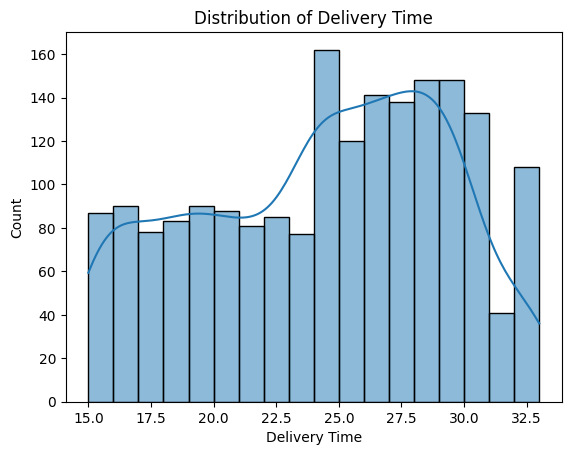

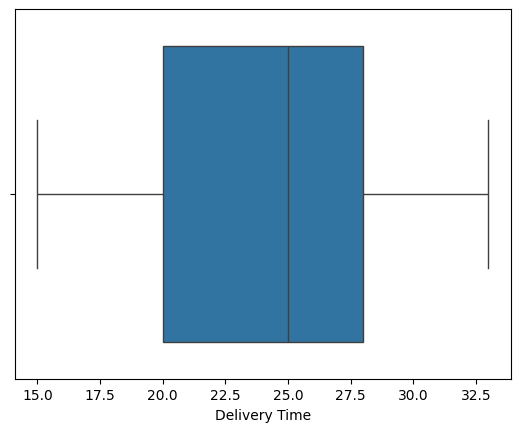

In [46]:
# The histogram for the delivery time
sns.histplot(data=df,x='delivery_time', binwidth = 1, kde=True, stat="count").set(xlabel='Delivery Time', title='Distribution of Delivery Time')
plt.show()

# The boxplot for the delivery time
sns.boxplot(data=df,x='delivery_time').set(xlabel='Delivery Time')
plt.show()

#### Observations: 
- Maximum orders are getting delivered in around 24-25 minutes.
- Lot of orders are taking 24- 31 minutes to deliver.
- I think, dividing this in weekend and weekday will be helpful for further study.
- Also, its observed that the data is slightly skewed to the left.

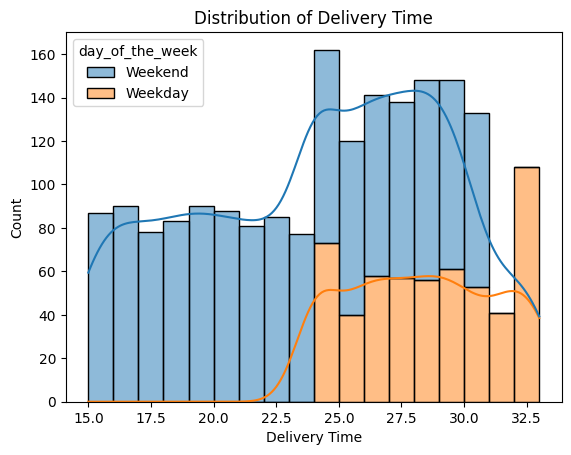

In [48]:
# The histogram for the delivery time showing day of the week
sns.histplot(data=df,x='delivery_time', binwidth = 1, kde=True, stat="count", hue='day_of_the_week', multiple='stack').set(xlabel='Delivery Time', title='Distribution of Delivery Time')
plt.show()

#### Observations: 
- It's only weekday's orders which are taking more than 31 minitues to deliver.
- Minimum delievry time for weekday's order is between 24-25 mins compared to 15 mins for weekend's order.
---

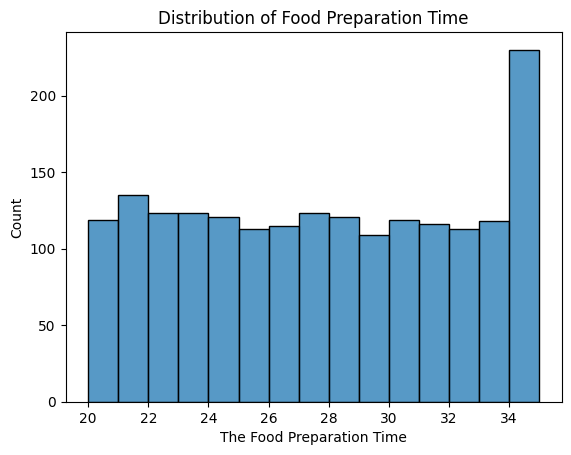

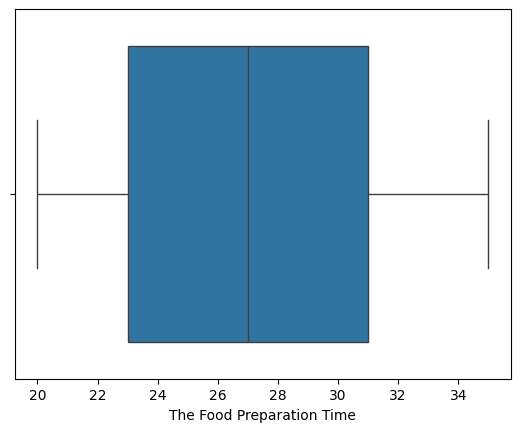

In [50]:
# Histogram for the food preparation time
sns.histplot(data=df,x='food_preparation_time', binwidth=1, stat="count").set(xlabel='The Food Preparation Time', title='Distribution of Food Preparation Time') 
plt.show()

# Boxplot for the food preparation time
sns.boxplot(data=df,x='food_preparation_time').set(xlabel='The Food Preparation Time') 
plt.show()

#### Observations: 
- It looks like there are over 200 orders which are taking 34-35 mins to prepare food, other than that, almost all remaining orders are evenly distributed for the preparation time. 
---

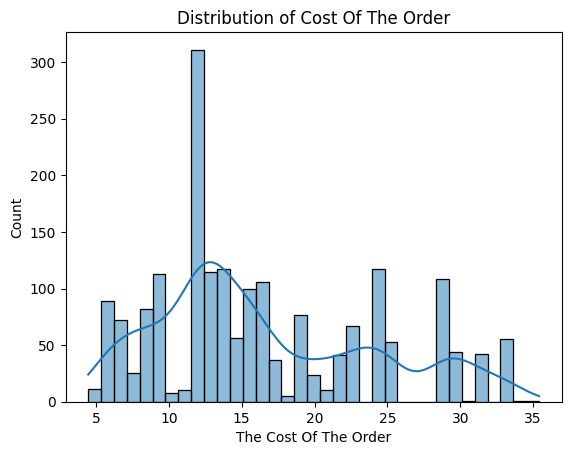

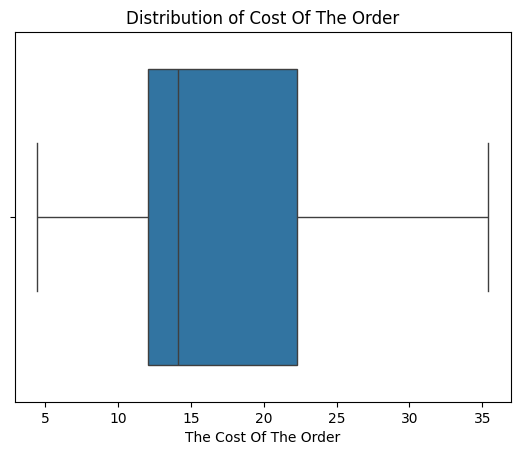

In [52]:
# Histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order',bins= 35, kde=True).set(xlabel='The Cost Of The Order', title='Distribution of Cost Of The Order') 
plt.show()

# Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order').set(xlabel='The Cost Of The Order', title='Distribution of Cost Of The Order') 
plt.show()

#### Obervations:
- Out of all orders, maximum i.e. over 300 orders cost around $12.
- Its observed that the data slightly skewed to the right. It means, customers are preferring low cost orders.
---

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [55]:
# The top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
- Top 5 resturants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi , Blue Ribbon Fried Chicken and  Parm.
- But it's possible that Blue Ribbon Sushi and Blue Ribbon Fried Chicken are same resturants and Sushi and chicken are part of food order.
- Let's see how many resurants have name with Blue Ribbon?

In [57]:
df[df['restaurant_name'].str.startswith('Blue Ribbon ')]['restaurant_name'].unique()

array(['Blue Ribbon Sushi Izakaya', 'Blue Ribbon Fried Chicken',
       'Blue Ribbon Sushi', 'Blue Ribbon Sushi Bar & Grill',
       'Blue Ribbon Brooklyn'], dtype=object)

In [58]:
Blue_Ribbon_total_order = df[df['restaurant_name'].str.startswith('Blue Ribbon ')]['restaurant_name'].value_counts()
Blue_Ribbon_total_order.loc['Total'] = Blue_Ribbon_total_order.sum()
Blue_Ribbon_total_order

Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Blue Ribbon Sushi Bar & Grill     44
Blue Ribbon Sushi Izakaya         29
Blue Ribbon Brooklyn               4
Total                            292
Name: restaurant_name, dtype: int64

#### Observations:
- There are total 5 resturants with name starting with Blue Ribbon. As Sushi, Fried chicken and Izakaya are part of cuisines, there is a high possibility that some of them are same resurants and that there is mistake in the data.
- If there all are poiniting to one resturants then Blue Ribbon will have highest count for orders.
- This needs furthere data clarification and then cleaninng if needed. (won't be doing as part of this exercise)
---

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [61]:
# The most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
- American is the most popular cuinise on weekend with total orders of 415.
---

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [64]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])


# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
- Around 29.24% orders cost more than $20. 
---

### **Question 10**: What is the mean order delivery time? [1 mark]

In [67]:
# The mean delivery time
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for the orders is', round(mean_del_time, 2), 'minutes')
# print('The mean delivery time for the orders is', round(df['delivery_time'].mean(), 2), 'minutes')


The mean delivery time for the orders is 24.16 minutes


#### Observations:
- It is observered that the mean delivery time forr the orders is 24.16 minutes.
---

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [70]:
# The top 3 most frequent customers
df['customer_id'].value_counts().head(3) 

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
- Top 3 customers are with customer_id as 52832, 47440 and 83287. They have placed 13, 10 and 9 orders respectively. 
---

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


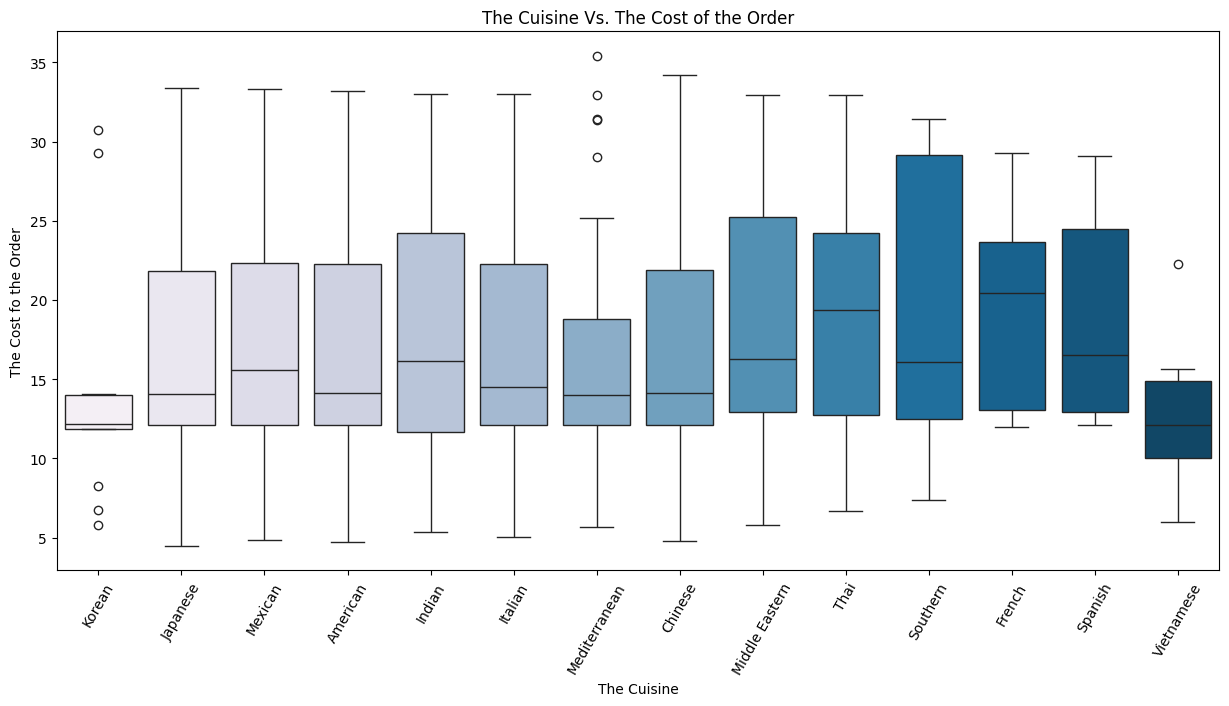

In [74]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.title('The Cuisine Vs. The Cost of the Order')
plt.xlabel('The Cuisine')
plt.ylabel('The Cost fo the Order')
plt.show()

#### Observations: 
- The most cuisines had a cost from about 10 to 25 dollars per order with a few outliers.
---

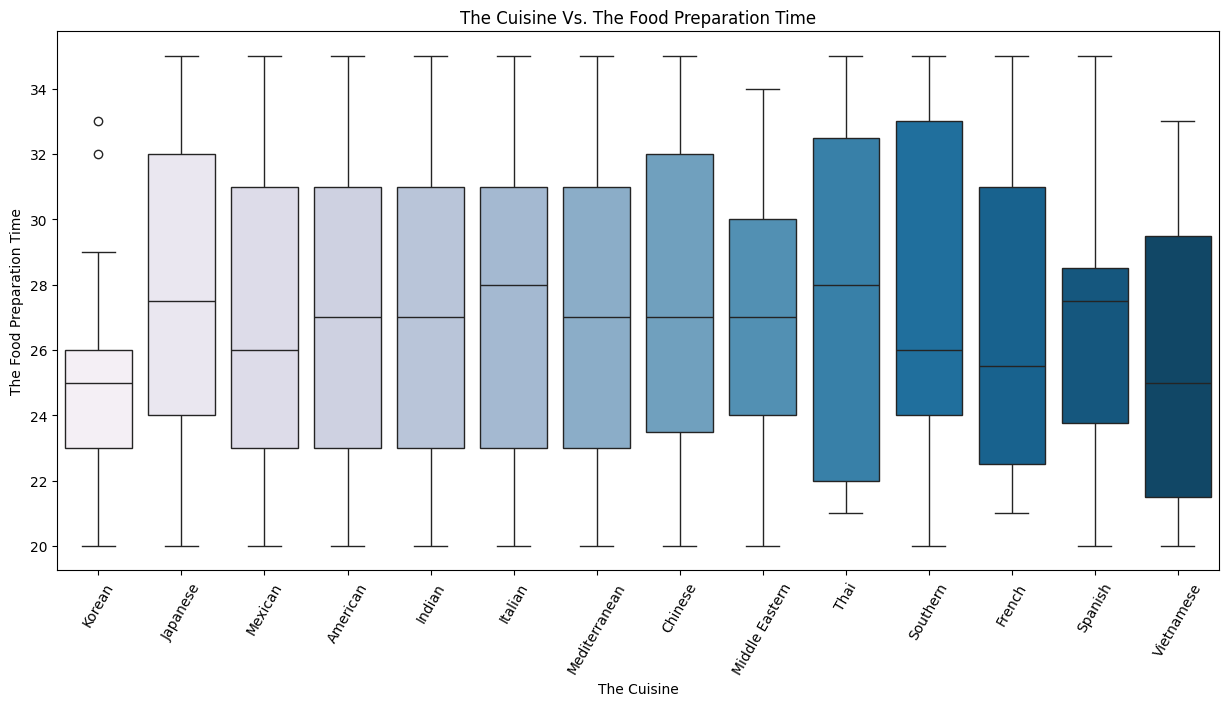

In [76]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x="cuisine_type", y= "food_preparation_time", data=df, palette = 'PuBu', hue = "cuisine_type")  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.title('The Cuisine Vs. The Food Preparation Time')
plt.xlabel('The Cuisine')
plt.ylabel('The Food Preparation Time')
plt.show()

#### Observations: 
- Most of them take 22-33 mins. 
- Korean cuisine have outliers, showing some Korean food items are taking longer time to prepare.
---

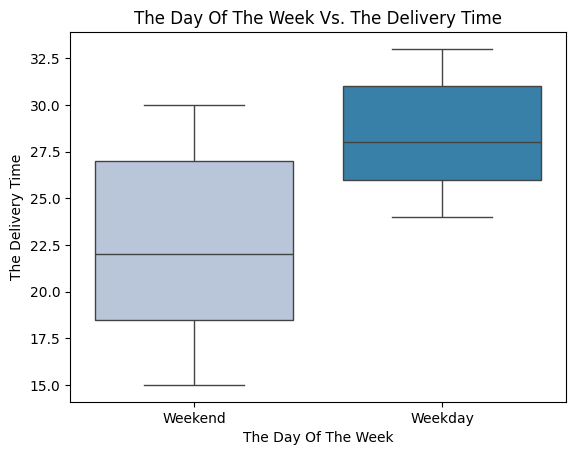

In [78]:
# Relationship between day of the week and the delivery time
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week")
plt.title('The Day Of The Week Vs. The Delivery Time')
plt.xlabel('The Day Of The Week')
plt.ylabel('The Delivery Time')
plt.show()

#### Observations: 
- Weekday delievry takes more time than weekend. 
---

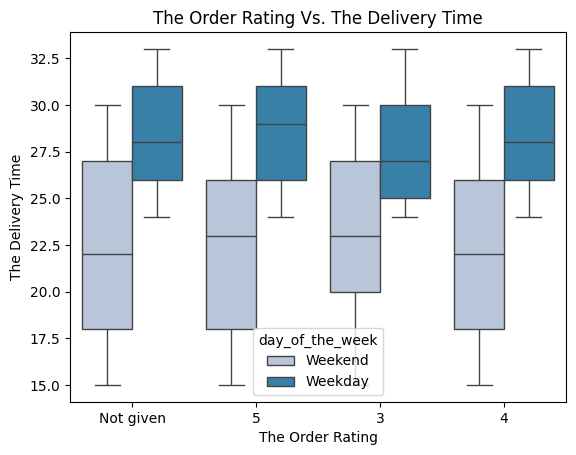

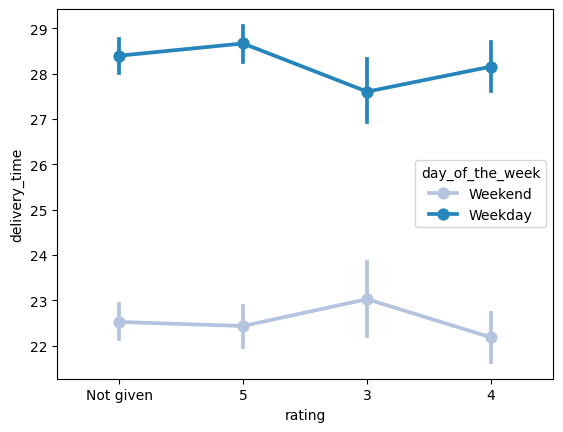

In [80]:
# Relationship between Rating and the delivery time
sns.boxplot(x = "rating", y = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week")
# sns.boxplot(x = 'rating', y = 'delivery_time', data = df)
plt.title('The Order Rating Vs. The Delivery Time')
plt.xlabel('The Order Rating')
plt.ylabel('The Delivery Time')
plt.show()

# trying pointplot
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, palette = 'PuBu', hue = "day_of_the_week")
plt.show()

#### Observations:
- Doesn't seem that rating and delivery time has any relation here. 
---

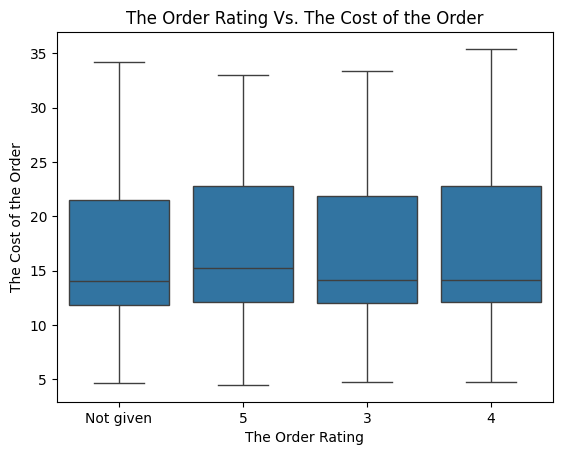

In [82]:
# Relationship between Rating and the cost of the order
sns.boxplot(x = "rating", y = "cost_of_the_order", data = df)
plt.title('The Order Rating Vs. The Cost of the Order')
plt.xlabel('The Order Rating')
plt.ylabel('The Cost of the Order')
plt.show()

#### Observations:
- Doesn't seem that rating and the cost of the order has any relation here. 
---

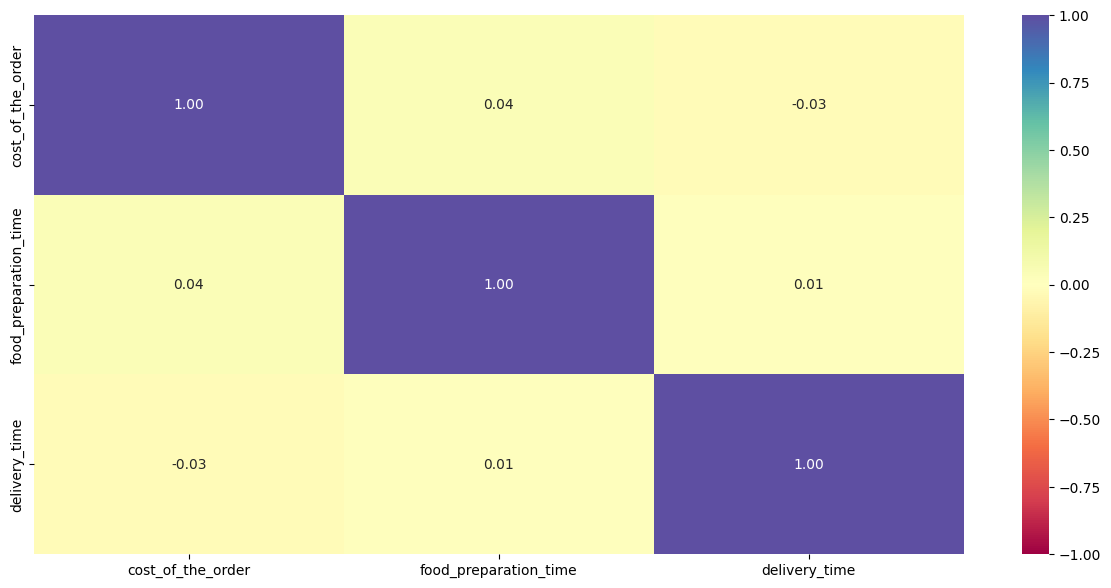

In [84]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
- No clear correation is seen here. 
---

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [87]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [88]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] 

# Filter the main dataframe to only include restaurants with more than 50 ratings
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Calculate the mean rating for each restaurant and sort in descending order
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() 

# Filter to only include restaurants with average rating greater than 4
# Then sort by rating in descending order and reset the index
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)

# Display the final dataframe of top-rated restaurants (rating > 4)
df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
- The four restaurants that may quality for the promotional offer criteria are Shake Shack, The Meatball Shop, Blue Ribbon Fried Chicken and Blue Ribbon Sushi. 
---

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [91]:
# The function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

# Apply the revenue calculation function to each row in the 'cost_of_the_order' column and store the results in a new column called 'Revenue'
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [92]:
# The total revenue and print it
total_rev = df['Revenue'].sum()

print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:
- The total revenue for the 1898 orders is $6166.30.
--- 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [95]:
# Calculate the total delivery time by adding food preparation time and delivery time and then add this as a new column 'total_time' to the dataframe
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count how many orders have total delivery time greater than 60 minutes
Order_60=df['total_time'][df['total_time']>60].count()

# Calculate the percentage of orders with delivery time > 60 minutes
# Order_60/df['total_time'].count()*100, 2
# round(Order_60/df['total_time'].count()*100, 2)
print(f"The percentage of orders which take more than 60 minutes to get delivered from the time the order is placed is: {round(Order_60 / df['total_time'].count() * 100, 2)}%")

# Alternative ways to print
# print('The percentage of orders which take more than 60 minutes to get delivered from the time the order is placed is',
#       round(Order_60/df['total_time'].count()*100, 2),
#     '%')

# Alternative ways to calculate the percentage
# df.shape[0]
# round(Order_60/df.shape[0]*100, 2)


The percentage of orders which take more than 60 minutes to get delivered from the time the order is placed is: 10.54%


#### Observations:
- It is observered that the percentage of orders which take more than 60 minutes to get delivered from the time the order is placed is: 10.54%.
---

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [98]:
# The mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean(),2),
     'minutes')


# The mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean(),2),
     'minutes')


The mean delivery time on weekdays is around 28.34 minutes
The mean delivery time on weekends is around 22.47 minutes


#### Observations:
- The mean delivery time on weekdays is around 28.34 minutes.
- The mean delivery time on weekends is around 22.47 minutes.
---

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are 1898 food orders, 14 cuinies and 178 resturants
*  The 4 most popular cuisine types are Japanese, American, Italian and Chinese with 200+ orders.
*  More than 1/3 orders are not rated.
*  Delievry time or food preparation time doesn't impacts rating.
*  Weekdays delievery time is more.
*  More orders are places on weekends

### Recommendations:

*  Resturants name conformations is needed one more time, for example: it's possible that Blue Ribbon Sushi and Blue Ribbon Fried Chicken are same resturants and Sushi and chicken are part of food order. This may impact the most popular resturants.
*  Weekedays delievery time needs some investigation, may need more drivers or better delievery options.

---